<a href="https://colab.research.google.com/github/zalfajhra/2025_VK_TI2C/blob/main/Jobsheet_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praktikum D1 - Regresi dari Citra Sintetis (Prediksi Radius Lingkaran)**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

import tensorflow as tf
from tensorflow.keras import layers, models

# Generator 1 sample
def make_sample(img_size=64, min_r=5, max_r=20):
  r = np.random.randint(min_r, max_r + 1) # radius acak
  img = np.zeros((img_size, img_size), dtype=np.uint8)
  cx = np.random.randint(r, img_size - r) # center-x
  cy = np.random.randint(r, img_size - r) # center-y
  cv2.circle(img, (cx, cy), r, (255,), -1) # lingkaran putih terisi
  img = (img / 255.0).astype(np.float32)
  # 3-channel biar kompatibel CNN
  img3 = np.stack([img, img, img], axis=-1)
  return img3, float(r), (cx, cy)

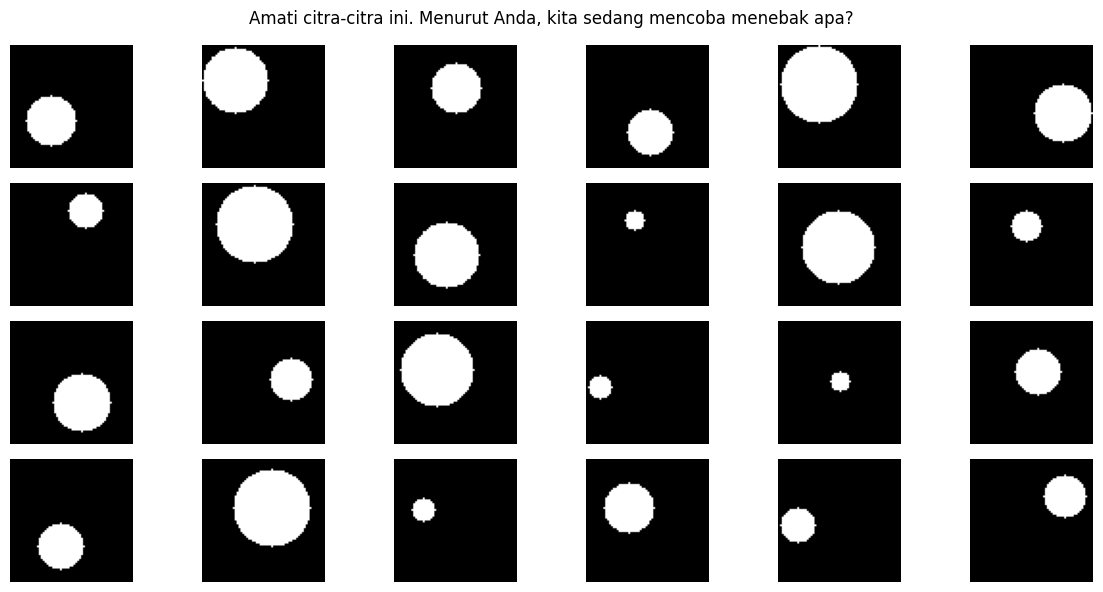

In [3]:
# Buat 24 contoh untuk visualisasi
N_show = 24
samples = [make_sample() for _ in range(N_show)]
imgs = [s[0] for s in samples]
rads = [s[1] for s in samples]
centers = [s[2] for s in samples]
# Grid gambar tanpa label:
cols = 6
rows = N_show // cols
plt.figure(figsize=(12, 6))
for i in range(N_show):
  plt.subplot(rows, cols, i+1)
  plt.imshow(imgs[i].squeeze(), cmap='gray')
  plt.axis('off')
  plt.suptitle("Amati citra-citra ini. Menurut Anda, kita sedang mencoba menebak apa?")
plt.tight_layout()
plt.show()

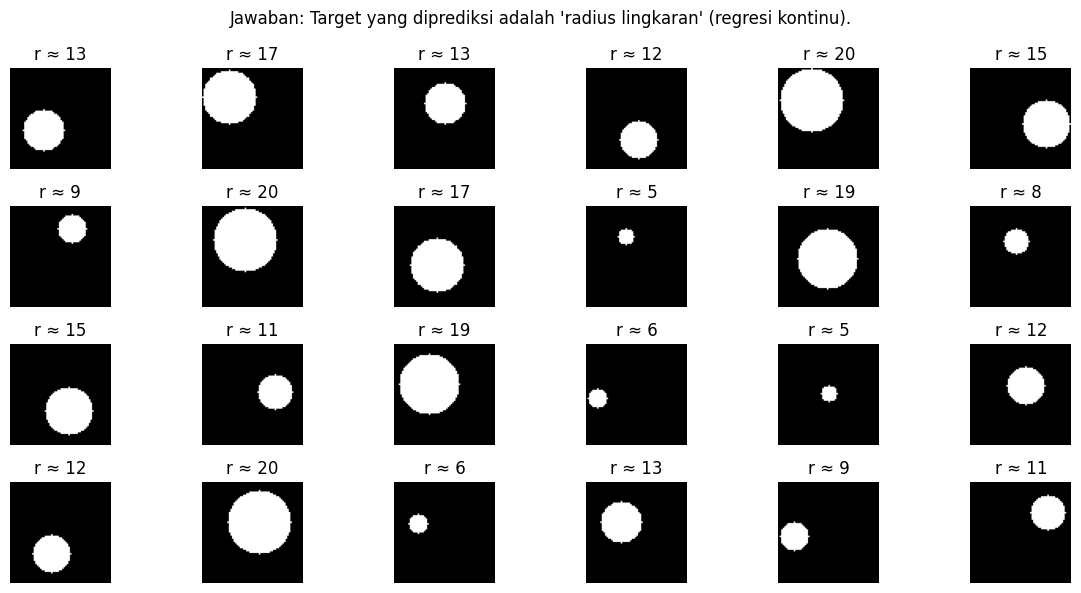

In [4]:
# Tampilkan kembali, sekarang tampilkan radius (label) di judul tiap subplot
plt.figure(figsize=(12, 6))
for i in range(N_show):
  plt.subplot(rows, cols, i+1)
  plt.imshow(imgs[i].squeeze(), cmap='gray')
  plt.title(f"r ≈ {int(rads[i])}")
  plt.axis('off')
plt.suptitle("Jawaban: Target yang diprediksi adalah 'radius lingkaran' (regresi kontinu).")
plt.tight_layout()
plt.show()

In [5]:
# Siapkan dataset lebih besar untuk training
N = 3000
X, y, C = zip(*[make_sample() for _ in range(N)])
X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.float32)

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42)
# Model CNN sederhana
model = models.Sequential([
    layers.Input((64,64,3)),
    layers.Conv2D(32, 3, activation='relu'), layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'), layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1) # output regresi
    ])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(Xtr, ytr, validation_data=(Xte, yte),
                    epochs=12, batch_size=64, verbose=0)

# Evaluasi
y_pred = model.predict(Xte).ravel()
mae = mean_absolute_error(yte, y_pred)
rmse = float(np.sqrt(np.mean((yte - y_pred)**2)))
r2 = r2_score(yte, y_pred)
print(f"MAE={mae:.3f} | RMSE={rmse:.3f} | R2={r2:.3f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
MAE=1.019 | RMSE=1.246 | R2=0.921


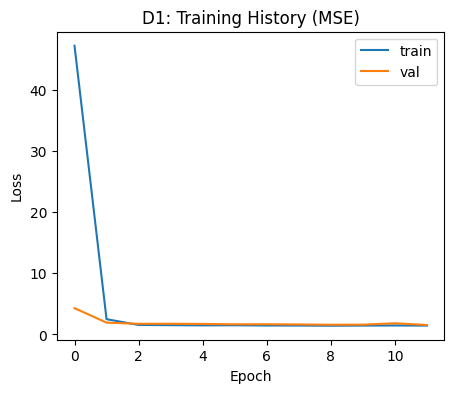

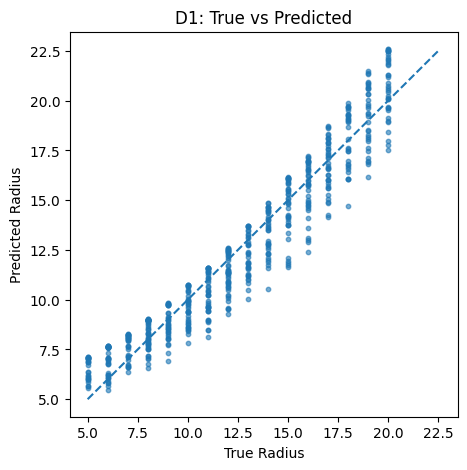

In [6]:
# Plot loss
plt.figure(figsize=(5,4))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title("D1: Training History (MSE)")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend(); plt.show()

# Scatter True vs Pred
plt.figure(figsize=(5,5))
plt.scatter(yte, y_pred, s=10, alpha=0.6)
lims = [min(yte.min(), y_pred.min()), max(yte.max(), y_pred.max())]
plt.plot(lims, lims, '--')
plt.xlabel("True Radius"); plt.ylabel("Predicted Radius")
plt.title("D1: True vs Predicted")
plt.show()

# Tantangan Mini

1. Ubah rentang radius (mis. 8–28) dan lihat dampaknya ke MAE/RMSE/R2.

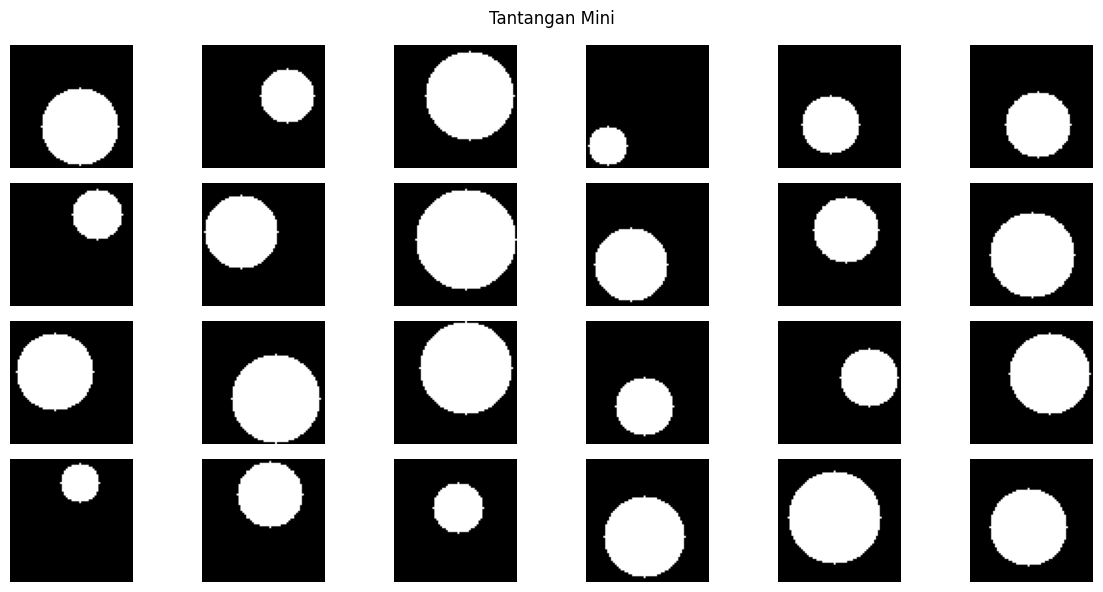

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

import tensorflow as tf
from tensorflow.keras import layers, models

# Generator 1 sample
def make_sample(img_size=64, min_r=8, max_r=28):
  r = np.random.randint(min_r, max_r + 1) # radius acak
  img = np.zeros((img_size, img_size), dtype=np.uint8)
  cx = np.random.randint(r, img_size - r) # center-x
  cy = np.random.randint(r, img_size - r) # center-y
  cv2.circle(img, (cx, cy), r, (255,), -1) # lingkaran putih terisi
  img = (img / 255.0).astype(np.float32)
  # 3-channel biar kompatibel CNN
  img3 = np.stack([img, img, img], axis=-1)
  return img3, float(r), (cx, cy)

  # Buat 24 contoh untuk visualisasi
N_show = 24
samples = [make_sample() for _ in range(N_show)]
imgs = [s[0] for s in samples]
rads = [s[1] for s in samples]
centers = [s[2] for s in samples]
# Grid gambar tanpa label:
cols = 6
rows = N_show // cols
plt.figure(figsize=(12, 6))
for i in range(N_show):
  plt.subplot(rows, cols, i+1)
  plt.imshow(imgs[i].squeeze(), cmap='gray')
  plt.axis('off')
  plt.suptitle("Tantangan Mini")
plt.tight_layout()
plt.show()

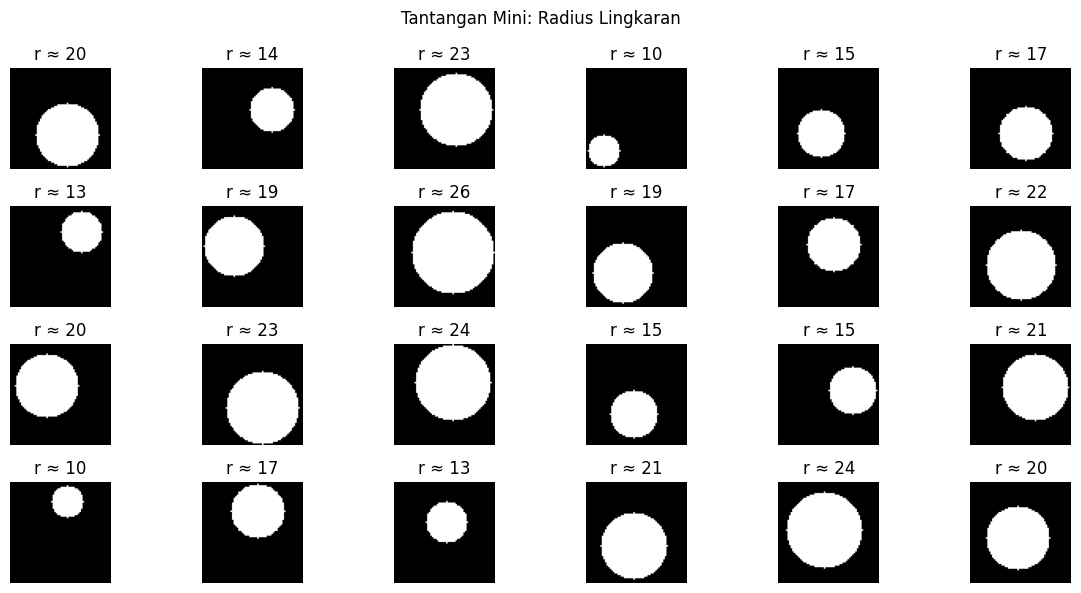

In [8]:
# Tampilkan kembali, sekarang tampilkan radius (label) di judul tiap subplot
plt.figure(figsize=(12, 6))
for i in range(N_show):
  plt.subplot(rows, cols, i+1)
  plt.imshow(imgs[i].squeeze(), cmap='gray')
  plt.title(f"r ≈ {int(rads[i])}")
  plt.axis('off')
plt.suptitle("Tantangan Mini: Radius Lingkaran")
plt.tight_layout()
plt.show()

In [9]:
# Siapkan dataset lebih besar untuk training
N = 3000
X, y, C = zip(*[make_sample() for _ in range(N)])
X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.float32)

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42)
# Model CNN sederhana
model = models.Sequential([
    layers.Input((64,64,3)),
    layers.Conv2D(32, 3, activation='relu'), layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'), layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1) # output regresi
    ])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(Xtr, ytr, validation_data=(Xte, yte),
                    epochs=12, batch_size=64, verbose=0)

# Evaluasi
y_pred = model.predict(Xte).ravel()
mae = mean_absolute_error(yte, y_pred)
rmse = float(np.sqrt(np.mean((yte - y_pred)**2)))
r2 = r2_score(yte, y_pred)
print(f"MAE={mae:.3f} | RMSE={rmse:.3f} | R2={r2:.3f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
MAE=0.768 | RMSE=0.952 | R2=0.975


## 2. Tambahkan noise (blur, noise Gaussian) ke citra → bagaimana performanya?

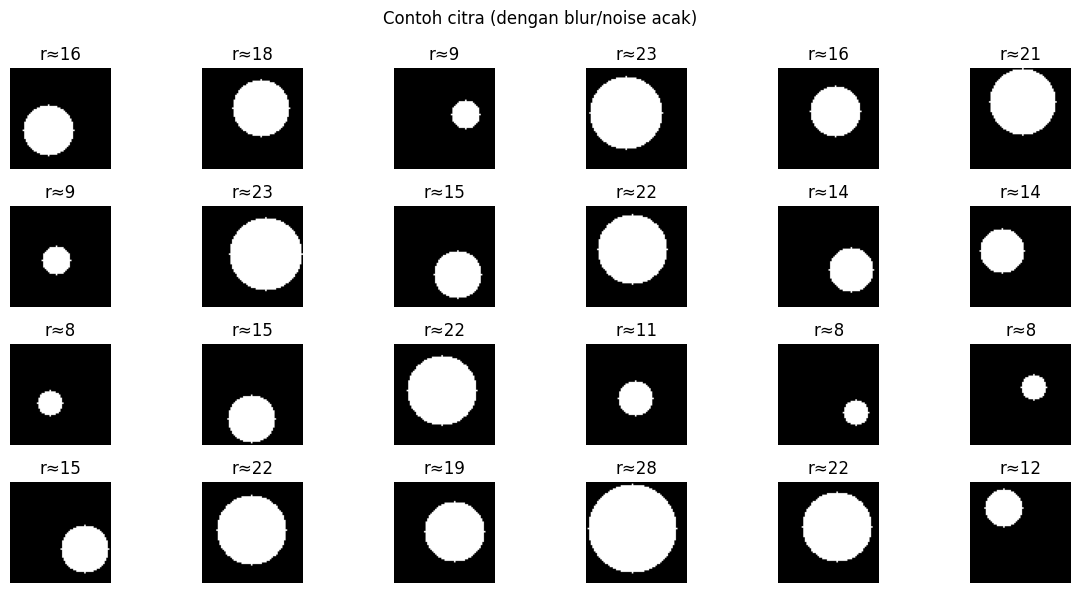

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

import tensorflow as tf
from tensorflow.keras import layers, models

# Generator 1 sample
def make_sample(img_size=64, min_r=8, max_r=28, add_blur=True, blur_prob=0.5,
                add_noise=True, noise_prob=0.5, noise_sigma_range=(0.0, 0.08)):
  r = np.random.randint(min_r, max_r + 1) # radius acak
  img = np.zeros((img_size, img_size), dtype=np.uint8)
  cx = np.random.randint(r, img_size - r) # center-x
  cy = np.random.randint(r, img_size - r) # center-y
  cv2.circle(img, (cx, cy), r, (255,), -1) # lingkaran putih terisi
  img_f = (img / 255.0).astype(np.float32)

  # tambahkan blur secara acak
  if add_blur and (np.random.rand() < blur_prob):
    k = int(np.random.choice([1, 3, 5, 7]))  # 1,3,5,7
    if k > 1:
      # cv2.GaussianBlur but input harus 2D or 3-channel; kita blur 2D first
      img_f = cv2.GaussianBlur(img_f, (k, k), 0)

  # tambahkan gaussian noise (pada skala 0..1)
  if add_noise and (np.random.rand() < noise_prob):
    sigma = float(np.random.uniform(noise_sigma_range[0], noise_sigma_range[1]))
    if sigma > 0:
      noise = np.random.normal(loc=0.0, scale=sigma, size=img_f.shape).astype(np.float32)
      img_f = img_f + noise
      img_f = np.clip(img_f, 0.0, 1.0)

  # 3-channel biar kompatibel CNN
  img3 = np.stack([img, img, img], axis=-1)
  return img3, float(r), (cx, cy)

N_show = 24
samples = [make_sample() for _ in range(N_show)]
imgs = [s[0] for s in samples]
rads = [s[1] for s in samples]

cols = 6
rows = N_show // cols
plt.figure(figsize=(12, 6))
for i in range(N_show):
    plt.subplot(rows, cols, i+1)
    plt.imshow(imgs[i].squeeze(), cmap='gray')
    plt.title(f"r≈{int(rads[i])}")
    plt.axis('off')
plt.suptitle("Contoh citra (dengan blur/noise acak)")
plt.tight_layout()
plt.show()

In [11]:
N = 3000
X, y, C = zip(*[make_sample(min_r=8, max_r=28,
                            add_blur=True, blur_prob=0.5,
                            add_noise=True, noise_prob=0.5,
                            noise_sigma_range=(0.0, 0.08)) for _ in range(N)])
X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.float32)

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42)

# Model CNN sederhana (sama seperti awal)
model = models.Sequential([
    layers.Input((64,64,3)),
    layers.Conv2D(32, 3, activation='relu'), layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'), layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1) # output regresi
    ])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(Xtr, ytr, validation_data=(Xte, yte),
                    epochs=12, batch_size=64, verbose=0)

# Evaluasi
y_pred = model.predict(Xte).ravel()
mae = mean_absolute_error(yte, y_pred)
rmse = float(np.sqrt(np.mean((yte - y_pred)**2)))
r2 = r2_score(yte, y_pred)
print(f"MAE={mae:.3f} | RMSE={rmse:.3f} | R2={r2:.3f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
MAE=0.298 | RMSE=0.388 | R2=0.996


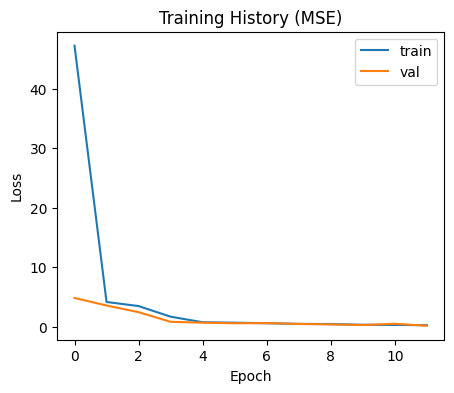

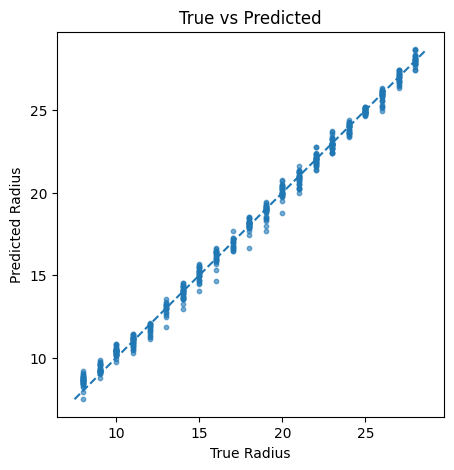

In [12]:
# Plot loss
plt.figure(figsize=(5,4))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title("Training History (MSE)")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend(); plt.show()

# Scatter True vs Pred
plt.figure(figsize=(5,5))
plt.scatter(yte, y_pred, s=10, alpha=0.6)
lims = [min(yte.min(), y_pred.min()), max(yte.max(), y_pred.max())]
plt.plot(lims, lims, '--')
plt.xlabel("True Radius"); plt.ylabel("Predicted Radius")
plt.title("True vs Predicted")
plt.show()

## 3. Jadikan tugas multi-output: prediksikan [r,cx,cy][r, c_x, c_y][r,cx,cy] sekaligus; metrik evaluasi apa yang cocok?

Epoch 1/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - loss: 570.0580 - mae: 20.5179 - val_loss: 154.0244 - val_mae: 9.0264
Epoch 2/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 103.2976 - mae: 7.0629 - val_loss: 58.3706 - val_mae: 5.8851
Epoch 3/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 54.2951 - mae: 5.4718 - val_loss: 50.8366 - val_mae: 4.9039
Epoch 4/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 49.1841 - mae: 4.7798 - val_loss: 49.2336 - val_mae: 4.8531
Epoch 5/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 46.5558 - mae: 4.6236 - val_loss: 46.7726 - val_mae: 4.6667
Epoch 6/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 44.5369 - mae: 4.4997 - val_loss: 44.4556 - val_mae: 4.5144
Epoch 7/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 42.4168 - mae: 4.3817 - val_loss: 42.2166 - val_mae: 4.3969
Epoch 8/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 37.7685 - mae: 4.1043 - val_loss: 38.2432 - val_mae: 4.1968
Epoch 9/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 16m

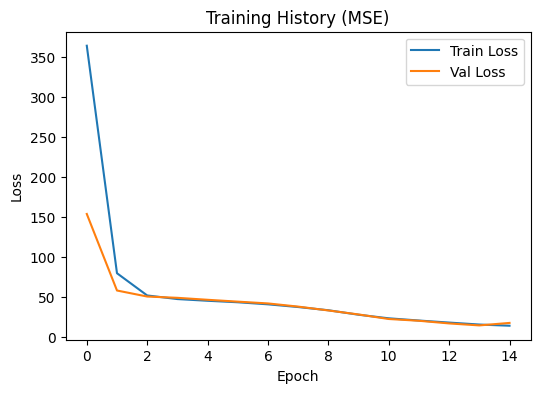

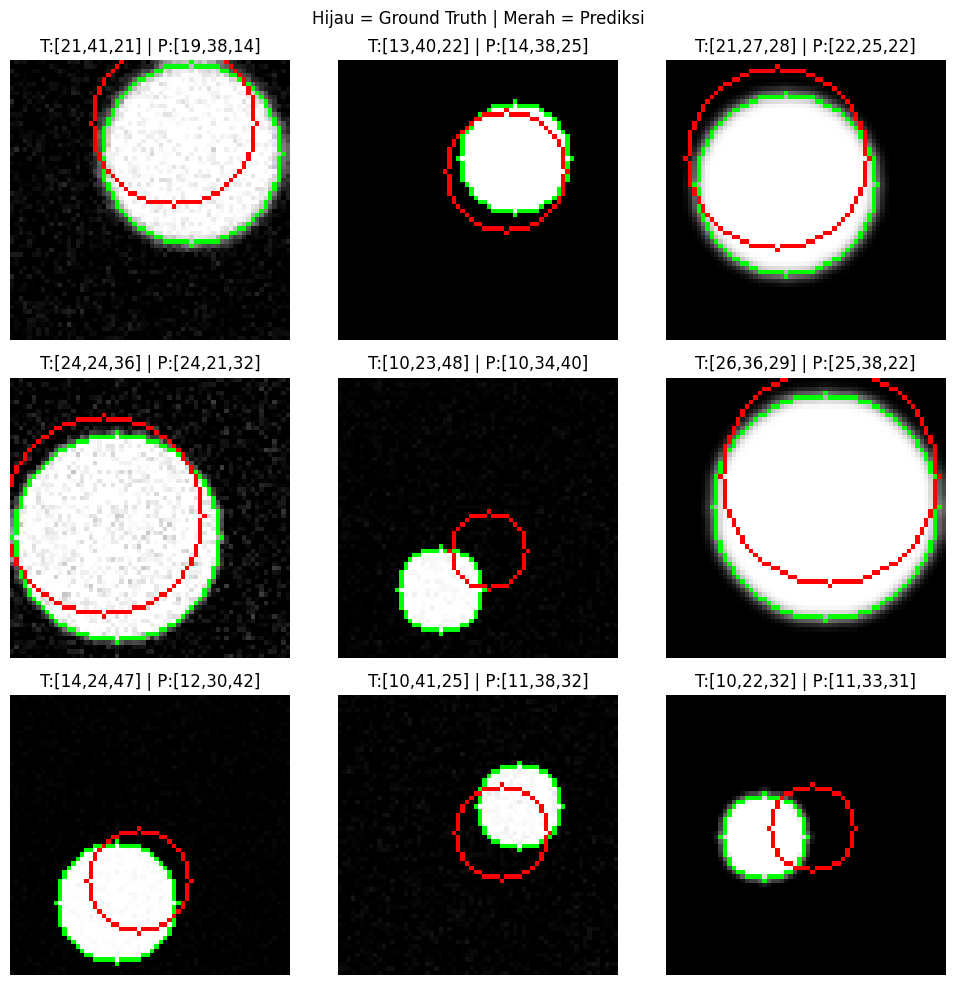

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras import layers, models

# ====================================================================
# 🔹 Fungsi pembuat sample citra lingkaran
# ====================================================================
def make_sample(img_size=64, min_r=8, max_r=28,
                add_blur=True, blur_prob=0.5,
                add_noise=True, noise_prob=0.5,
                noise_sigma_range=(0.0, 0.08)):
    """
    Menghasilkan satu sample: (image 64x64x3 float32, [r, cx, cy])
    """
    # Radius acak
    r = np.random.randint(min_r, max_r + 1)
    img = np.zeros((img_size, img_size), dtype=np.uint8)

    # Pusat acak (agar lingkaran tidak keluar batas)
    cx = np.random.randint(r, img_size - r)
    cy = np.random.randint(r, img_size - r)

    # Gambar lingkaran putih
    cv2.circle(img, (cx, cy), r, (255,), -1)

    # Normalisasi 0–1
    img_f = (img / 255.0).astype(np.float32)

    # Tambahkan blur acak
    if add_blur and (np.random.rand() < blur_prob):
        k = int(np.random.choice([1, 3, 5, 7]))  # kernel acak
        if k > 1:
            img_f = cv2.GaussianBlur(img_f, (k, k), 0)

    # Tambahkan Gaussian noise acak
    if add_noise and (np.random.rand() < noise_prob):
        sigma = float(np.random.uniform(*noise_sigma_range))
        if sigma > 0:
            noise = np.random.normal(0.0, sigma, img_f.shape).astype(np.float32)
            img_f = np.clip(img_f + noise, 0.0, 1.0)

    # 3-channel (biar cocok dengan CNN)
    img3 = np.stack([img_f, img_f, img_f], axis=-1)
    return img3, np.array([float(r), float(cx), float(cy)], dtype=np.float32)


# ====================================================================
# 🔹 Buat dataset
# ====================================================================
N = 3000
samples = [make_sample() for _ in range(N)]
X = np.array([s[0] for s in samples], dtype=np.float32)
y = np.array([s[1] for s in samples], dtype=np.float32)

# Split data
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42)

# ====================================================================
# 🔹 Arsitektur CNN multi-output
# ====================================================================
model = models.Sequential([
    layers.Input((64, 64, 3)),
    layers.Conv2D(32, 3, activation='relu'), layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'), layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3)  # Output: [r, cx, cy]
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# ====================================================================
# 🔹 Training
# ====================================================================
history = model.fit(Xtr, ytr,
                    validation_data=(Xte, yte),
                    epochs=15, batch_size=64, verbose=1)

# ====================================================================
# 🔹 Evaluasi
# ====================================================================
y_pred = model.predict(Xte)
r_true, cx_true, cy_true = yte[:, 0], yte[:, 1], yte[:, 2]
r_pred, cx_pred, cy_pred = y_pred[:, 0], y_pred[:, 1], y_pred[:, 2]

# MAE & RMSE per output
mae_r = mean_absolute_error(r_true, r_pred)
mae_cx = mean_absolute_error(cx_true, cx_pred)
mae_cy = mean_absolute_error(cy_true, cy_pred)

rmse_r = np.sqrt(np.mean((r_true - r_pred)**2))
rmse_cx = np.sqrt(np.mean((cx_true - cx_pred)**2))
rmse_cy = np.sqrt(np.mean((cy_true - cy_pred)**2))

# R² per output
r2_r = r2_score(r_true, r_pred)
r2_cx = r2_score(cx_true, cx_pred)
r2_cy = r2_score(cy_true, cy_pred)

# Center distance (euclidean)
center_dist = np.sqrt((cx_true - cx_pred)**2 + (cy_true - cy_pred)**2)
mean_center_dist = np.mean(center_dist)
median_center_dist = np.median(center_dist)

# Aggregated RMSE
agg_rmse = np.sqrt(np.mean((r_true - r_pred)**2 +
                           (cx_true - cx_pred)**2 +
                           (cy_true - cy_pred)**2))

# Tampilkan hasil
print("\n=== EVALUATION METRICS ===")
print(f"MAE_r   = {mae_r:.3f} | RMSE_r   = {rmse_r:.3f} | R2_r   = {r2_r:.3f}")
print(f"MAE_cx  = {mae_cx:.3f} | RMSE_cx  = {rmse_cx:.3f} | R2_cx  = {r2_cx:.3f}")
print(f"MAE_cy  = {mae_cy:.3f} | RMSE_cy  = {rmse_cy:.3f} | R2_cy  = {r2_cy:.3f}")
print(f"Mean center dist = {mean_center_dist:.3f}px | Median = {median_center_dist:.3f}px")
print(f"Aggregated RMSE (r,cx,cy) = {agg_rmse:.3f}\n")

# ====================================================================
# 🔹 Plot loss selama training
# ====================================================================
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Training History (MSE)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# ====================================================================
# 🔹 Visualisasi prediksi vs ground truth
# ====================================================================
n_show = 9
idxs = np.random.choice(len(Xte), n_show, replace=False)
plt.figure(figsize=(10, 10))
for i, idx in enumerate(idxs):
    img = Xte[idx].squeeze()
    true_r, true_cx, true_cy = yte[idx]
    pred_r, pred_cx, pred_cy = y_pred[idx]

    img_vis = (img * 255).astype(np.uint8).copy()
    # Gambar lingkaran asli (hijau)
    cv2.circle(img_vis, (int(true_cx), int(true_cy)), int(true_r), (0, 255, 0), 1)
    # Gambar lingkaran prediksi (merah)
    cv2.circle(img_vis, (int(pred_cx), int(pred_cy)), int(pred_r), (255, 0, 0), 1)

    plt.subplot(3, 3, i + 1)
    plt.imshow(img_vis)
    plt.title(f"T:[{true_r:.0f},{true_cx:.0f},{true_cy:.0f}] | P:[{pred_r:.0f},{pred_cx:.0f},{pred_cy:.0f}]")
    plt.axis('off')
plt.suptitle("Hijau = Ground Truth | Merah = Prediksi", fontsize=12)
plt.tight_layout()
plt.show()

# **Praktikum D2 - Menebak Umur Manusia dari Foto Wajah**

In [14]:
# Jalankan ini di awal notebook
from google.colab import files
files.upload() # pilih file kaggle.json dari komputer Anda

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zalfajhra","key":"5fd84ecd25aee1c4a55cfee2caf2c26c"}'}

In [15]:
import os, shutil
if os.path.exists("kaggle.json"):
  os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)
  shutil.copy("kaggle.json", os.path.expanduser("~/.kaggle/kaggle.json"))
  os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 0o600)
  !pip -q install kaggle
  print("✅ Kaggle API siap digunakan.")
else:
  print(" kaggle.json belum ditemukan. Upload terlebih dahulu.")

✅ Kaggle API siap digunakan.


In [16]:
# Unduh dataset UTKFace (sekali saja)
!kaggle datasets download -d jangedoo/utkface-new -p /content -q
!unzip -q /content/utkface-new.zip -d /content/utk
print("✅ Dataset UTKFace berhasil diekstrak.")

Dataset URL: https://www.kaggle.com/datasets/jangedoo/utkface-new
License(s): copyright-authors
✅ Dataset UTKFace berhasil diekstrak.


Total gambar ditemukan: 23708


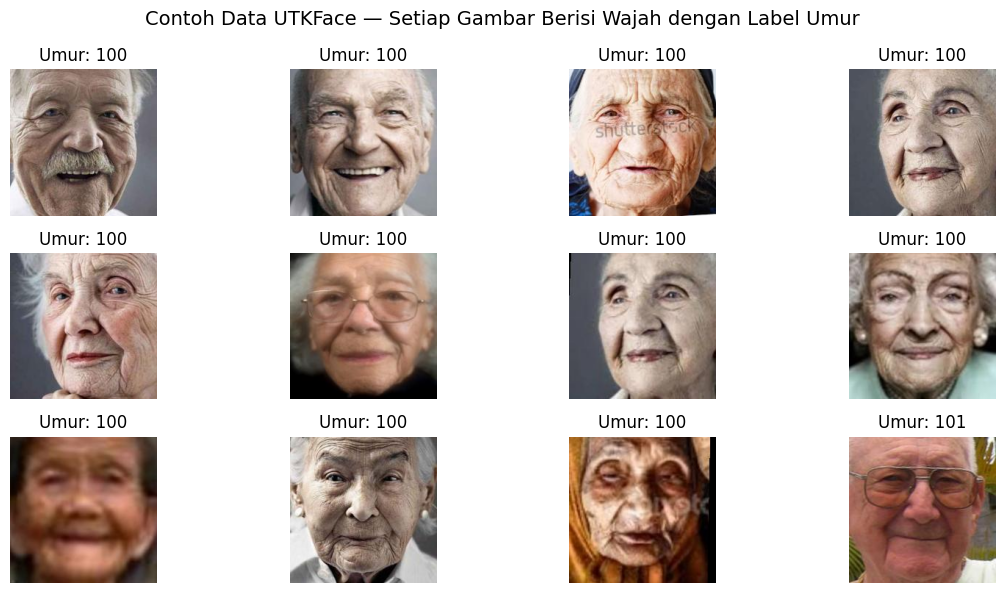

In [17]:
import matplotlib.pyplot as plt
import os, glob
from PIL import Image

# Ambil 12 gambar acak dari dataset
files = glob.glob("/content/utk/UTKFace/*.jpg")
files = sorted(files)
print(f"Total gambar ditemukan: {len(files)}")
plt.figure(figsize=(12, 6))
for i, f in enumerate(files[:12]):
  # Ambil umur dari nama file
  age = int(os.path.basename(f).split("_")[0])
  img = Image.open(f)
  plt.subplot(3, 4, i + 1)
  plt.imshow(img)
  plt.title(f"Umur: {age}")
  plt.axis("off")
plt.suptitle("Contoh Data UTKFace — Setiap Gambar Berisi Wajah dengan Label Umur", fontsize=14)
plt.tight_layout()
plt.show()

In [18]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

def parse_age_from_name(fp):
  return int(os.path.basename(fp).split('_')[0])

ages = np.array([parse_age_from_name(f) for f in files], dtype=np.float32)
train_files, test_files, y_train, y_test = train_test_split(files, ages, test_size=0.2, random_state=42)

IMG_SIZE = 160
def load_img(fp, label):
  img = tf.io.read_file(fp)
  img = tf.image.decode_jpeg(img, channels=3)
  img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
  return img / 255.0, label

train_ds = tf.data.Dataset.from_tensor_slices((train_files, y_train)).map(load_img).batch(64)
test_ds = tf.data.Dataset.from_tensor_slices((test_files, y_test)).map(load_img).batch(64)

print("✅ Dataset siap dilatih.")

✅ Dataset siap dilatih.


In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Gunakan GPU jika tersedia
print("Hardware:", "GPU" if tf.config.list_physical_devices('GPU') else
"CPU")

# Buat arsitektur model
base_model = tf.keras.applications.MobileNetV2(include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3), weights='imagenet')
base_model.trainable = False # tahap awal: freeze backbone

# Tambahkan head regresi
inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = tf.keras.applications.mobilenet_v2.preprocess_input(inputs * 255.0)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(1)(x) # output tunggal: umur
model = tf.keras.Model(inputs, outputs)

# Kompilasi model
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss='mse', metrics=['mae'])
model.summary()

Hardware: GPU
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ multiply (Multiply)             │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide (TrueDivide)        │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract (Subtract)             │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_160            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 72s 142ms/step - loss: 342.7755 - mae: 13.5994 - val_loss: 159.9220 - val_mae: 9.6679 - learning_rate: 0.0010
Epoch 2/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - loss: 155.7113 - mae: 9.3505 - val_loss: 146.7019 - val_mae: 9.1427 - learning_rate: 0.0010
Epoch 3/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 22s 56ms/step - loss: 145.2066 - mae: 8.9100 - val_loss: 143.3828 - val_mae: 9.0060 - learning_rate: 0.0010
Epoch 4/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 18s 49ms/step - loss: 140.0265 - mae: 8.7229 - val_loss: 138.3572 - val_mae: 8.7344 - learning_rate: 0.0010
Epoch 5/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 17s 58ms/step - loss: 137.7774 - mae: 8.6278 - val_loss: 137.1048 - val_mae: 8.7105 - learning_rate: 0.0010
Epoch 6/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 14s 49ms/step - loss: 135.6496 - mae: 8.5335 - val_loss: 135.7322 - val_mae: 8.6424 - learning_rate: 0.0010
Epoch 7/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - loss: 132.6684 - mae: 8.4476 - val_loss: 133.2000 - va

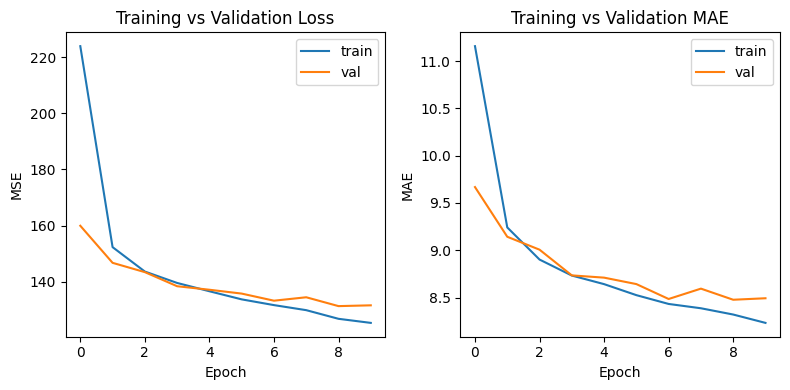

In [20]:
# Callback untuk pelatihan yang lebih stabil
cb = [tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True, monitor='val_loss'),
      tf.keras.callbacks.ReduceLROnPlateau(patience=2, factor=0.5, min_lr=1e-5, monitor='val_loss')]

history = model.fit(train_ds, validation_data=test_ds, epochs=10, callbacks=cb, verbose=1)

# Visualisasi perubahan loss dan MAE selama pelatihan:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('Epoch'); plt.ylabel('MSE'); plt.title('Training vs Validation Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='train')
plt.plot(history.history['val_mae'], label='val')
plt.xlabel('Epoch'); plt.ylabel('MAE')
plt.title('Training vs Validation MAE')
plt.legend()
plt.tight_layout()
plt.show()

Epoch 1/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 47s 99ms/step - loss: 185.8261 - mae: 10.1113 - val_loss: 157.4564 - val_mae: 9.7993 - learning_rate: 1.0000e-04
Epoch 2/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - loss: 78.3274 - mae: 6.5854 - val_loss: 133.0230 - val_mae: 8.8594 - learning_rate: 1.0000e-04
Epoch 3/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - loss: 50.4864 - mae: 5.3698 - val_loss: 115.1071 - val_mae: 8.2170 - learning_rate: 1.0000e-04
Epoch 4/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - loss: 37.6000 - mae: 4.6584 - val_loss: 113.8121 - val_mae: 8.1636 - learning_rate: 1.0000e-04
Epoch 5/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - loss: 29.9844 - mae: 4.1846 - val_loss: 104.0580 - val_mae: 7.3913 - learning_rate: 1.0000e-04


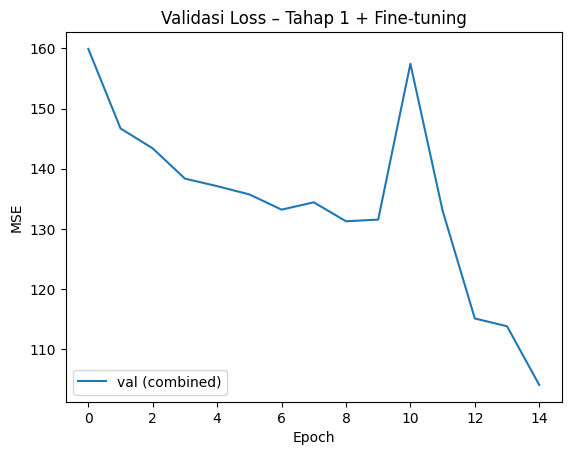

In [21]:
# Aktifkan kembali sebagian layer terakhir untuk fine-tuning
base_model.trainable = True
for layer in base_model.layers[:-30]:
  layer.trainable = False # beku sebagian besar layer

# Recompile dengan learning rate lebih kecil
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4), loss='mse', metrics=['mae'])
history_ft = model.fit(train_ds, validation_data=test_ds, epochs=5, callbacks=cb, verbose=1)

# Visualisasi gabungan training dan fine-tuning:
plt.plot(history.history['val_loss'] + history_ft.history['val_loss'], label='val (combined)')
plt.title("Validasi Loss – Tahap 1 + Fine-tuning")
plt.xlabel("Epoch"); plt.ylabel("MSE")
plt.legend(); plt.show()

MAE = 7.39 tahun
RMSE = 10.20 tahun
R2 = 0.738


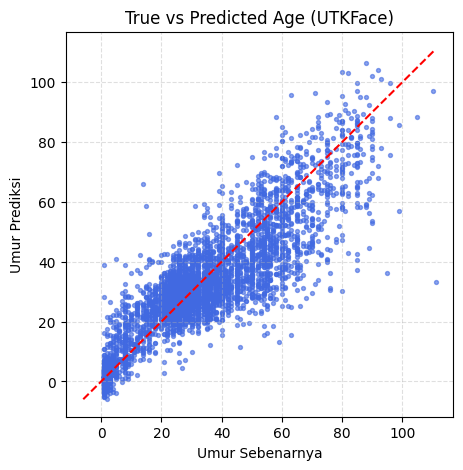

In [22]:
from math import sqrt

y_pred = np.concatenate([model.predict(batch[0], verbose=0).ravel() for batch in test_ds])
mae = mean_absolute_error(y_test, y_pred)
rmse = sqrt(np.mean((y_test - y_pred)**2))
r2 = r2_score(y_test, y_pred)

print(f"MAE = {mae:.2f} tahun")
print(f"RMSE = {rmse:.2f} tahun")
print(f"R2 = {r2:.3f}")

# Plot “umur sebenarnya vs umur prediksi”:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, s=8, alpha=0.6, color='royalblue')
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, '--', color='red')
plt.xlabel("Umur Sebenarnya")
plt.ylabel("Umur Prediksi")
plt.title("True vs Predicted Age (UTKFace)")
plt.grid(True, linestyle='--', alpha=0.4)

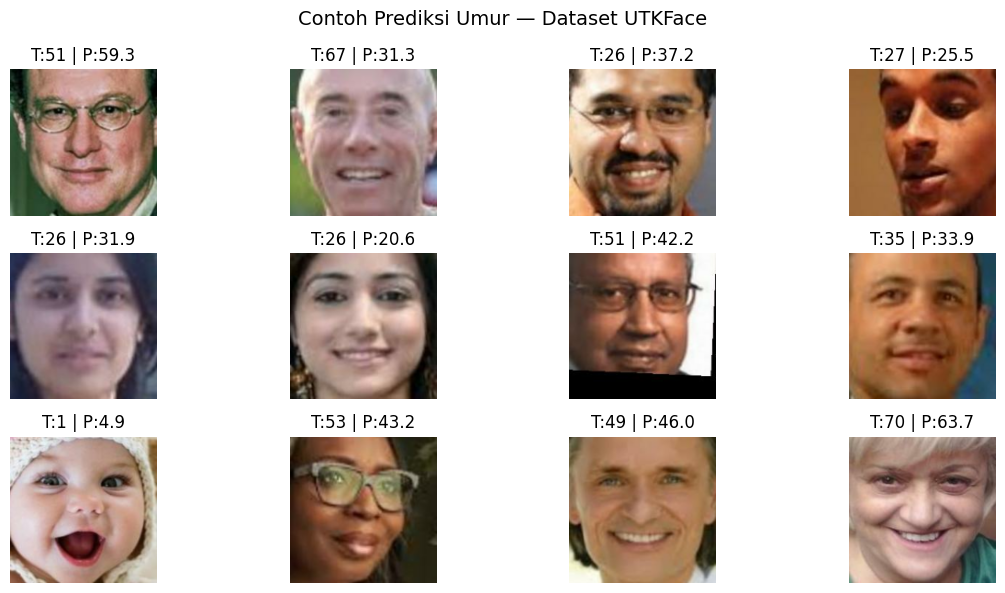

In [23]:
import random
sample_paths = random.sample(test_files, 12)
plt.figure(figsize=(12,6))

for i, path in enumerate(sample_paths):
  img = tf.io.read_file(path)
  img = tf.image.decode_jpeg(img, channels=3)
  img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))/255.0
  true_age = int(os.path.basename(path).split('_')[0])
  pred_age = model.predict(tf.expand_dims(img, 0), verbose=0).ravel()[0]
  plt.subplot(3,4,i+1)
  plt.imshow(img.numpy())
  plt.title(f"T:{true_age} | P:{pred_age:.1f}")
  plt.axis('off')
plt.suptitle("Contoh Prediksi Umur — Dataset UTKFace", fontsize=14)
plt.tight_layout()
plt.show()

# TANTANGAN MINI

1. Tambahkan data augmentation ekstra (kontras, brightness, zoom)

In [24]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
from sklearn.metrics import mean_absolute_error

IMG_SIZE = 160

def load_img_augmented(fp, label):
    """Memuat dan mengaugmentasi gambar untuk data training."""
    img = tf.io.read_file(fp)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img / 255.0 # Normalisasi awal

    # Augmentasi Ekstra
    img = tf.image.random_contrast(img, lower=0.8, upper=1.2)
    img = tf.image.random_brightness(img, max_delta=0.1)

    # Simulasikan Zoom/Crop acak: Tambahkan padding dan potong kembali
    paddings = tf.constant([[15, 15], [15, 15], [0, 0]])
    img_padded = tf.pad(img, paddings, "REFLECT")
    img = tf.image.random_crop(img_padded, size=[IMG_SIZE, IMG_SIZE, 3])

    img = tf.clip_by_value(img, 0.0, 1.0)

    return img, label

# Buat dataset baru dengan augmentasi
train_ds_aug = tf.data.Dataset.from_tensor_slices((train_files, y_train)).map(load_img_augmented).batch(64).prefetch(tf.data.AUTOTUNE)
test_ds_plain = tf.data.Dataset.from_tensor_slices((test_files, y_test)).map(load_img).batch(64).prefetch(tf.data.AUTOTUNE)

base_model_aug = tf.keras.applications.MobileNetV2(include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3), weights='imagenet')
base_model_aug.trainable = False

inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = tf.keras.applications.mobilenet_v2.preprocess_input(inputs * 255.0)
x = base_model_aug(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(1)(x)
model_aug = tf.keras.Model(inputs, outputs)

model_aug.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss='mse', metrics=['mae'])
cb = [tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True, monitor='val_loss'),
      tf.keras.callbacks.ReduceLROnPlateau(patience=2, factor=0.5, min_lr=1e-5, monitor='val_loss')]

print("Mulai Pelatihan Model dengan Augmentasi Ekstra...")
history_aug = model_aug.fit(train_ds_aug, validation_data=test_ds_plain, epochs=10, callbacks=cb, verbose=1)

# Evaluasi MAE
y_pred_aug = np.concatenate([model_aug.predict(batch[0], verbose=0).ravel() for batch in test_ds_plain])
mae_aug = mean_absolute_error(y_test, y_pred_aug)

print("\n--- HASIL TANTANGAN 1 ---")
print(f"MAE Model dengan Augmentasi Ekstra = {mae_aug:.2f} tahun")

Mulai Pelatihan Model dengan Augmentasi Ekstra...
Epoch 1/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 52s 145ms/step - loss: 326.1701 - mae: 13.3222 - val_loss: 156.0855 - val_mae: 9.4673 - learning_rate: 0.0010
Epoch 2/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 32s 107ms/step - loss: 161.2693 - mae: 9.4687 - val_loss: 144.4951 - val_mae: 8.9257 - learning_rate: 0.0010
Epoch 3/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 31s 105ms/step - loss: 152.4202 - mae: 9.1448 - val_loss: 140.3519 - val_mae: 8.7729 - learning_rate: 0.0010
Epoch 4/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 31s 103ms/step - loss: 150.3249 - mae: 9.0454 - val_loss: 141.3817 - val_mae: 8.8966 - learning_rate: 0.0010
Epoch 5/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 33s 113ms/step - loss: 149.5135 - mae: 8.9943 - val_loss: 137.4320 - val_mae: 8.7132 - learning_rate: 0.0010
Epoch 6/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 34s 114ms/step - loss: 142.0303 - mae: 8.7628 - val_loss: 135.0835 - val_mae: 8.5372 - learning_rate: 0.0010
Epoch 7/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 34s 113ms/step 

2. Ubah learning rate schedule atau optimizer.

Mulai Pelatihan Model (Fine-tuning) dengan Optimizer SGD...
Epoch 1/15
297/297 ━━━━━━━━━━━━━━━━━━━━ 46s 104ms/step - loss: 122.1636 - mae: 8.0735 - val_loss: 6875.0210 - val_mae: 81.0332 - learning_rate: 1.0000e-04
Epoch 2/15
297/297 ━━━━━━━━━━━━━━━━━━━━ 16s 48ms/step - loss: 66.6765 - mae: 5.9632 - val_loss: 4698.5776 - val_mae: 65.9640 - learning_rate: 1.0000e-04
Epoch 3/15
297/297 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - loss: 43.6578 - mae: 4.9444 - val_loss: 1654.3170 - val_mae: 37.6229 - learning_rate: 1.0000e-04
Epoch 4/15
297/297 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - loss: 29.0741 - mae: 4.0483 - val_loss: 807.2146 - val_mae: 25.1807 - learning_rate: 1.0000e-04
Epoch 5/15
297/297 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - loss: 21.6833 - mae: 3.5192 - val_loss: 643.9847 - val_mae: 22.4408 - learning_rate: 1.0000e-04
Epoch 6/15
297/297 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - loss: 18.1947 - mae: 3.2326 - val_loss: 309.8496 - val_mae: 14.5422 - learning_rate: 1.0000e-04
Epoch 7/15
297/297 ━━━━

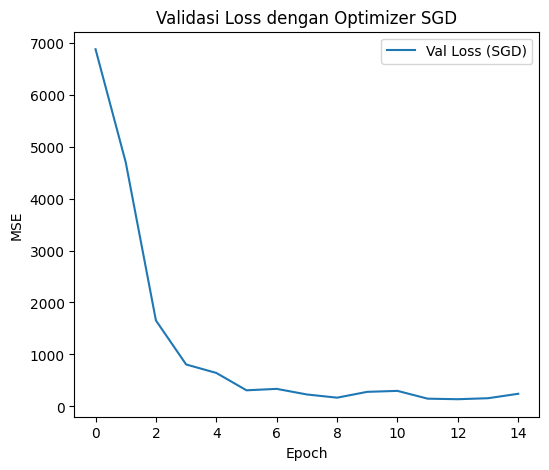


--- HASIL TANTANGAN 2 ---
❓ Apakah model lebih stabil? Periksa fluktuasi garis 'Val Loss' pada plot.


In [25]:
import tensorflow as tf
import matplotlib.pyplot as plt

model_sgd = tf.keras.models.clone_model(model)
model_sgd.set_weights(model.get_weights()) # Salin bobot model yang sudah dilatih

base_model_sgd = model_sgd.get_layer('mobilenetv2_1.00_160')

# Lakukan proses unfreeze
base_model_sgd.trainable = True
for layer in base_model_sgd.layers[:-30]:
    layer.trainable = False

# Gunakan Optimizer SGD
optimizer_sgd = tf.keras.optimizers.SGD(learning_rate=1e-4, momentum=0.9, nesterov=True) # LR kecil (1e-4) untuk fine-tuning
model_sgd.compile(optimizer=optimizer_sgd, loss='mse', metrics=['mae'])

# Gunakan callback yang sama
cb_sgd = [tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True, monitor='val_loss'),
          tf.keras.callbacks.ReduceLROnPlateau(patience=3, factor=0.1, min_lr=1e-6, monitor='val_loss')]

print("Mulai Pelatihan Model (Fine-tuning) dengan Optimizer SGD...")
history_sgd = model_sgd.fit(train_ds, validation_data=test_ds, epochs=15, callbacks=cb_sgd, verbose=1)

# Analisis Stabilitas
plt.figure(figsize=(6, 5))
plt.plot(history_sgd.history['val_loss'], label='Val Loss (SGD)')
plt.title('Validasi Loss dengan Optimizer SGD')
plt.xlabel('Epoch'); plt.ylabel('MSE')
plt.legend(); plt.show()

print("\n--- HASIL TANTANGAN 2 ---")
print("❓ Apakah model lebih stabil? Periksa fluktuasi garis 'Val Loss' pada plot.")

3. Pisahkan dataset per kelompok umur (0–10, 11–20, dst).

MAE Rata-rata per Kelompok Umur:
Kelompok 0-10: MAE = 4.33 tahun (Jumlah sampel: 602)
Kelompok 11-20: MAE = 7.65 tahun (Jumlah sampel: 284)
Kelompok 21-30: MAE = 4.91 tahun (Jumlah sampel: 1489)
Kelompok 31-40: MAE = 5.96 tahun (Jumlah sampel: 883)
Kelompok 41-50: MAE = 9.30 tahun (Jumlah sampel: 438)
Kelompok 51-60: MAE = 11.78 tahun (Jumlah sampel: 477)
Kelompok 61-70: MAE = 13.53 tahun (Jumlah sampel: 293)
Kelompok >70: MAE = 14.65 tahun (Jumlah sampel: 276)

Kelompok dengan error terbesar adalah: >70 (MAE: 14.65 tahun)


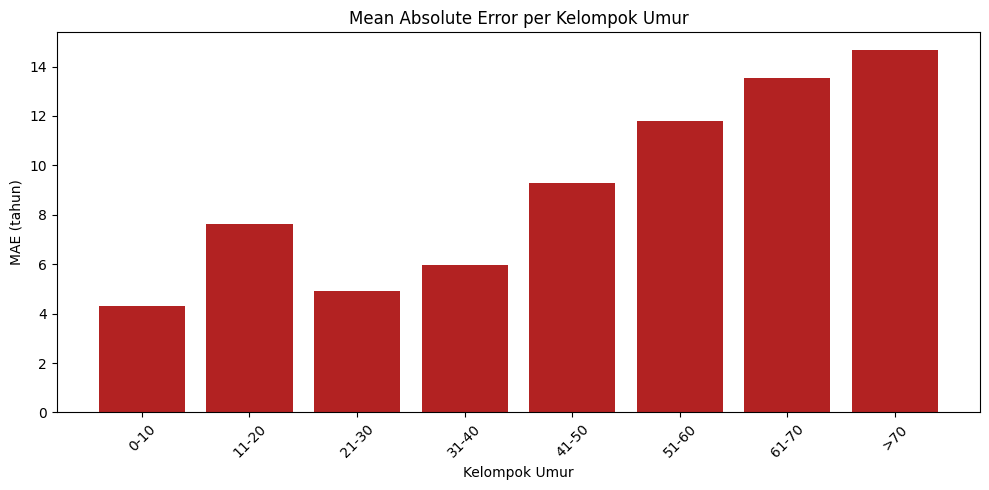

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# Hitung error absolut untuk setiap data uji
errors = np.abs(y_test - y_pred)

# Definisikan kelompok umur
bins = [0, 10, 20, 30, 40, 50, 60, 70, 120]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '>70']

# Kelompokkan data uji berdasarkan umur sebenarnya (y_test)
age_groups_idx = np.digitize(y_test, bins)
mae_per_group = {}

# Hitung MAE untuk setiap kelompok
for i, label in enumerate(labels, start=1):
    mask = age_groups_idx == i
    if np.sum(mask) > 0:
        mae_per_group[label] = np.mean(errors[mask])

# Tampilkan dan Analisis Hasil
print("MAE Rata-rata per Kelompok Umur:")
for group, mae in mae_per_group.items():
    print(f"Kelompok {group}: MAE = {mae:.2f} tahun (Jumlah sampel: {np.sum(age_groups_idx == labels.index(group) + 1)})")

if mae_per_group:
    max_mae_group = max(mae_per_group, key=mae_per_group.get)
    print(f"\nKelompok dengan error terbesar adalah: {max_mae_group} (MAE: {mae_per_group[max_mae_group]:.2f} tahun)")

# Visualisasi
groups = list(mae_per_group.keys())
maes = list(mae_per_group.values())
plt.figure(figsize=(10, 5))
plt.bar(groups, maes, color='firebrick')
plt.xlabel("Kelompok Umur"); plt.ylabel("MAE (tahun)")
plt.title("Mean Absolute Error per Kelompok Umur")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Saving zalfa.jpg to zalfa.jpg
Masukkan umur sebenarnya dari orang di gambar (angka): 19


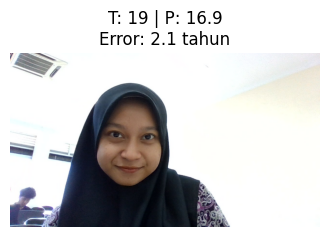

Umur Sebenarnya (T): 19 tahun
Umur Prediksi (P): 16.9 tahun
Error Absolut: 2.1 tahun


In [29]:
import tensorflow as tf
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import os

# Upload file
try:
    uploaded = files.upload()
    uploaded_filename = list(uploaded.keys())[0]
except IndexError:
    print("❌ Upload dibatalkan atau gagal. Lewati tantangan ini.")
    uploaded_filename = None

if uploaded_filename:
    # 1. INPUT UMUR ASLI
    while True:
        try:
            true_age_input = input("Masukkan umur sebenarnya dari orang di gambar (angka): ")
            true_age = int(true_age_input)
            break
        except ValueError:
            print("Input tidak valid. Masukkan angka bulat untuk umur.")

    IMG_SIZE = 160

    try:
        # Muat dan Preprocess Gambar
        img = tf.io.read_file(uploaded_filename)
        img = tf.image.decode_image(img, channels=3)
        img_resized = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
        img_normalized = img_resized / 255.0
        input_tensor = tf.expand_dims(img_normalized, 0)

        # Lakukan Prediksi (Gunakan model akhir 'model')
        pred_age = model.predict(input_tensor, verbose=0).ravel()[0]

        # Hitung Error
        error = abs(true_age - pred_age)

        # Tampilkan Hasil
        plt.figure(figsize=(4, 4))
        plt.imshow(img.numpy().astype(np.uint8))
        plt.title(f"T: {true_age} | P: {pred_age:.1f}\nError: {error:.1f} tahun")
        plt.axis('off')
        plt.show()

        print(f"Umur Sebenarnya (T): {true_age} tahun")
        print(f"Umur Prediksi (P): {pred_age:.1f} tahun")
        print(f"Error Absolut: {error:.1f} tahun")

    except Exception as e:
        print(f"Terjadi error saat memproses gambar: {e}")
        print("Pastikan file gambar yang diupload adalah file gambar wajah yang valid.")

# **Praktikum D3 - Menilai "Kepopuleran Hewan Peliharaan" dari Foto**

In [30]:
from google.colab import files
files.upload() # pilih kaggle.json dari komputer Anda
import os, shutil

if os.path.exists("kaggle.json"):
  os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)
  shutil.copy("kaggle.json", os.path.expanduser("~/.kaggle/kaggle.json"))
  os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 0o600)
  !pip -q install kaggle
  print("✅ Kaggle API siap digunakan.")
else:
  print(" kaggle.json belum ditemukan. Upload terlebih dahulu.")

Saving kaggle.json to kaggle (1).json
✅ Kaggle API siap digunakan.


In [31]:
# Unduh dataset Pawpularity (sekitar 800MB)
!kaggle competitions download -c petfinder-pawpularity-score -p /content -q
!unzip -q /content/petfinder-pawpularity-score.zip -d /content/paw
print("✅ Dataset Pawpularity berhasil diekstrak.")

✅ Dataset Pawpularity berhasil diekstrak.


                                 Id  Subject Focus  Eyes  Face  Near  Action  \
0  0007de18844b0dbbb5e1f607da0606e0              0     1     1     1       0   
1  0009c66b9439883ba2750fb825e1d7db              0     1     1     0       0   
2  0013fd999caf9a3efe1352ca1b0d937e              0     1     1     1       0   
3  0018df346ac9c1d8413cfcc888ca8246              0     1     1     1       0   
4  001dc955e10590d3ca4673f034feeef2              0     0     0     1       0   

   Accessory  Group  Collage  Human  Occlusion  Info  Blur  Pawpularity  \
0          0      1        0      0          0     0     0           63   
1          0      0        0      0          0     0     0           42   
2          0      0        0      1          1     0     0           28   
3          0      0        0      0          0     0     0           15   
4          0      1        0      0          0     0     0           72   

                                                path  
0  /content/p

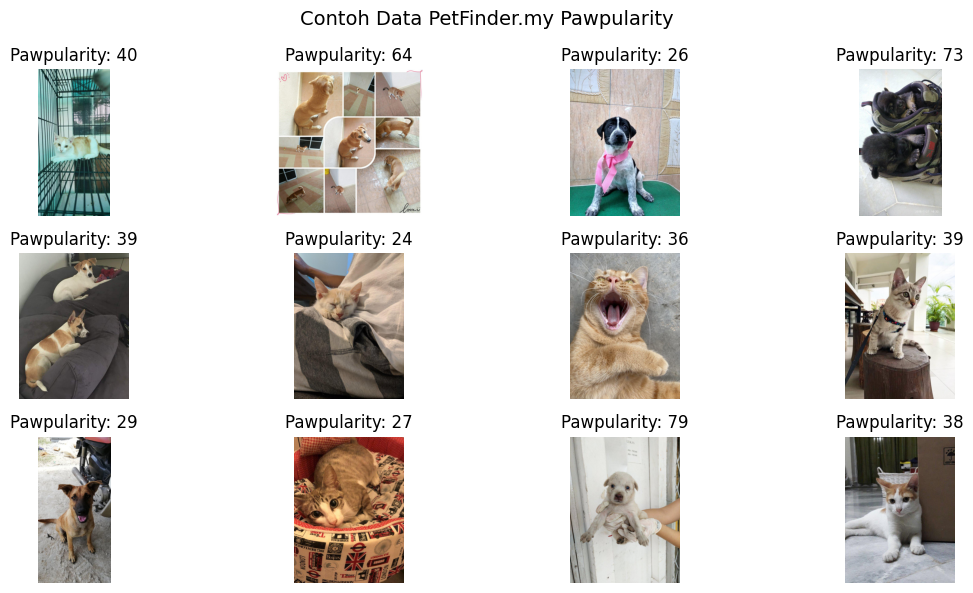

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image

# Muat CSV
df = pd.read_csv('/content/paw/train.csv')
df['path'] = df['Id'].apply(lambda x: f"/content/paw/train/{x}.jpg")
print(df.head())

# Tampilkan 12 contoh gambar
plt.figure(figsize=(12, 6))
for i, row in enumerate(df.sample(12, random_state=42).itertuples()):
  img = Image.open(row.path)
  plt.subplot(3, 4, i + 1)
  plt.imshow(img)
  plt.title(f"Pawpularity: {row.Pawpularity}")
  plt.axis("off")
plt.suptitle("Contoh Data PetFinder.my Pawpularity", fontsize=14)
plt.tight_layout()
plt.show()

In [33]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

IMG_SIZE = 224
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

def load_image(path, label):
  img = tf.io.read_file(path)
  img = tf.image.decode_jpeg(img, channels=3)
  img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
  img = tf.cast(img, tf.float32) / 255.0
  return img, tf.cast(label, tf.float32)

train_ds = tf.data.Dataset.from_tensor_slices((train_df['path'],
                                               train_df['Pawpularity']))\
                                               .map(load_image, num_parallel_calls=tf.data.AUTOTUNE)\
                                               .shuffle(4096).batch(64).prefetch(tf.data.AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices((val_df['path'],
                                             val_df['Pawpularity']))\
                                             .map(load_image, num_parallel_calls=tf.data.AUTOTUNE)\
                                             .batch(64).prefetch(tf.data.AUTOTUNE)

print(f"Dataset siap digunakan — {len(train_df)} untuk training, {len(val_df)} untuk validasi.")


Dataset siap digunakan — 7929 untuk training, 1983 untuk validasi.


In [34]:
from tensorflow.keras import layers, models

base = tf.keras.applications.EfficientNetB0( include_top=False, input_shape=(
    IMG_SIZE, IMG_SIZE, 3), weights='imagenet')
base.trainable = False # freeze sementara

inputs = tf.keras.Input((IMG_SIZE, IMG_SIZE, 3))
x = tf.keras.applications.efficientnet.preprocess_input(inputs * 255.0)
x = base(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(256, activation='relu')(x)
outputs = layers.Dense(1)(x)

model = tf.keras.Model(inputs, outputs)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ multiply_2 (Multiply)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_6      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,377,764 (16.70 MB)

 Trainable params: 328,193 (1.25 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [35]:
cb = [
    tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(patience=2, factor=0.5)]

history = model.fit(train_ds, validation_data=val_ds, epochs=10, callbacks=cb, verbose=1)

Epoch 1/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 127s 687ms/step - loss: 834.0164 - mae: 21.9013 - val_loss: 478.6817 - val_mae: 16.0365 - learning_rate: 0.0010
Epoch 2/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 68s 227ms/step - loss: 424.8030 - mae: 15.1685 - val_loss: 426.0486 - val_mae: 15.2093 - learning_rate: 0.0010
Epoch 3/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 39s 212ms/step - loss: 391.6964 - mae: 14.6863 - val_loss: 402.0475 - val_mae: 14.7218 - learning_rate: 0.0010
Epoch 4/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 38s 206ms/step - loss: 368.9384 - mae: 14.1798 - val_loss: 387.2016 - val_mae: 14.5617 - learning_rate: 0.0010
Epoch 5/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 37s 198ms/step - loss: 367.9193 - mae: 14.1910 - val_loss: 379.9616 - val_mae: 14.2126 - learning_rate: 0.0010
Epoch 6/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 42s 241ms/step - loss: 355.9514 - mae: 14.0717 - val_loss: 373.1227 - val_mae: 14.0200 - learning_rate: 0.0010
Epoch 7/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 39s 210ms/step - loss: 343.4748 - mae: 13.7169 - val_

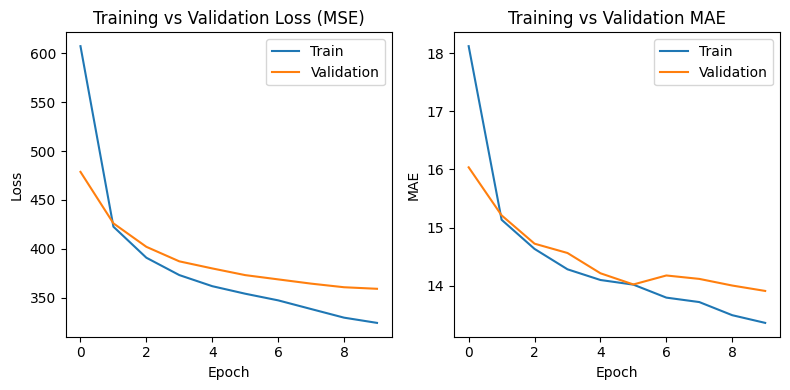

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title("Training vs Validation Loss (MSE)")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='Train')
plt.plot(history.history['val_mae'], label='Validation')
plt.title("Training vs Validation MAE")
plt.xlabel("Epoch"); plt.ylabel("MAE"); plt.legend()
plt.tight_layout()
plt.show()


MAE = 13.91
RMSE = 18.95
R²	= 0.188


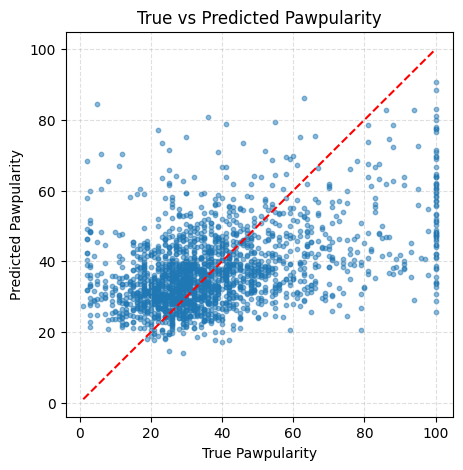

In [37]:
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
from math import sqrt

y_true = val_df['Pawpularity'].values.astype(np.float32)
y_pred = np.concatenate([model.predict(batch[0], verbose=0).ravel() for batch in val_ds])

mae = mean_absolute_error(y_true, y_pred)
rmse = sqrt(np.mean((y_true - y_pred)**2))
r2 = r2_score(y_true, y_pred)

print(f"MAE = {mae:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"R²	= {r2:.3f}")

# Plot hasil prediksi vs nilai sebenarnya:
plt.figure(figsize=(5,5))
plt.scatter(y_true, y_pred, s=10, alpha=0.5)
lims = [min(y_true.min(), y_pred.min()), max(y_true.max(), y_pred.max())]
plt.plot(lims, lims, '--', color='red')
plt.xlabel("True Pawpularity")
plt.ylabel("Predicted Pawpularity")
plt.title("True vs Predicted Pawpularity")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

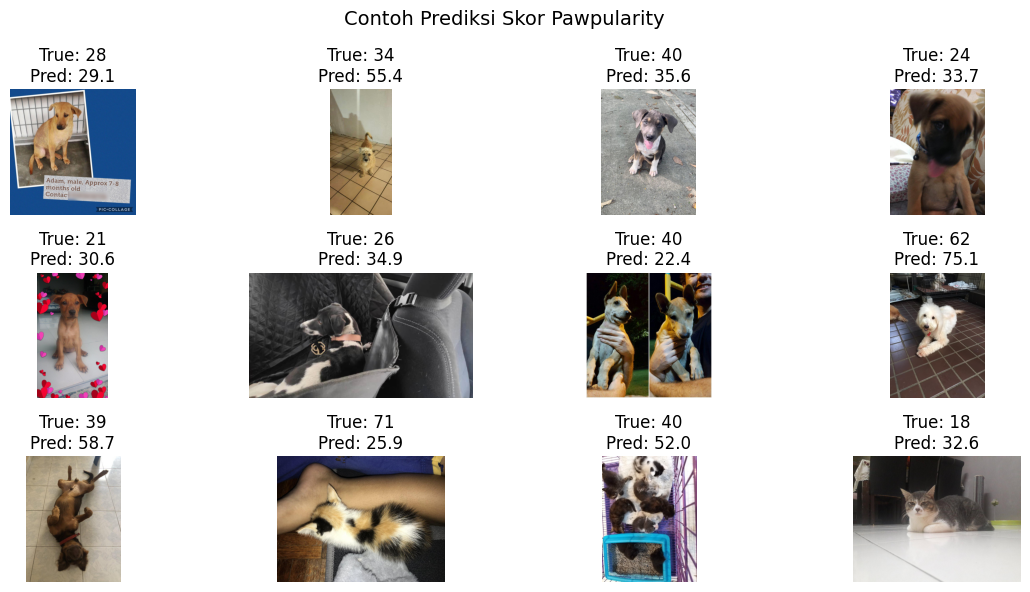

In [38]:
import random
from PIL import Image

sample_rows = val_df.sample(12, random_state=1)

plt.figure(figsize=(12,6))
for i, row in enumerate(sample_rows.itertuples()):
  img = Image.open(row.path)
  pred = model.predict(tf.expand_dims(load_image(row.path,
  row.Pawpularity)[0], 0), verbose=0).ravel()[0]
  plt.subplot(3,4,i+1)
  plt.imshow(img)
  plt.title(f"True: {row.Pawpularity}\nPred: {pred:.1f}")
  plt.axis('off')

plt.suptitle("Contoh Prediksi Skor Pawpularity", fontsize=14)
plt.tight_layout()
plt.show()

# TANTANGAN MINI

1. tambahkan data augmentation agar model tidak bosan dengan pola yang sama.

In [39]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np

IMG_SIZE = 224

def load_image_augmented(path, label):
    """Memuat dan mengaugmentasi gambar untuk data training."""
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
    img = tf.cast(img, tf.float32) / 255.0 # Normalisasi

    # --- Augmentasi Ekstra ---
    img = tf.image.random_flip_left_right(img)
    img = tf.image.rot90(img, k=tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))
    img = tf.image.random_contrast(img, lower=0.8, upper=1.2)
    img = tf.image.random_brightness(img, max_delta=0.1)

    return img, tf.cast(label, tf.float32)

# Buat dataset
train_ds_aug = tf.data.Dataset.from_tensor_slices((train_df['path'], train_df['Pawpularity']))\
                                                  .map(load_image_augmented, num_parallel_calls=tf.data.AUTOTUNE)\
                                                  .shuffle(4096).batch(64).prefetch(tf.data.AUTOTUNE)

# Gunakan validation dataset yang lama
print("Dataset Training dengan Augmentasi siap digunakan.")

# Kloning arsitektur model dasar (EfficientNetB0)
base_aug = tf.keras.applications.EfficientNetB0(include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3), weights='imagenet')
base_aug.trainable = False

inputs_aug = tf.keras.Input((IMG_SIZE, IMG_SIZE, 3))
x_aug = tf.keras.applications.efficientnet.preprocess_input(inputs_aug * 255.0)
x_aug = base_aug(x_aug, training=False)
x_aug = layers.GlobalAveragePooling2D()(x_aug)
x_aug = layers.Dropout(0.3)(x_aug)
x_aug = layers.Dense(256, activation='relu')(x_aug)
outputs_aug = layers.Dense(1)(x_aug)
model_aug = tf.keras.Model(inputs_aug, outputs_aug)

model_aug.compile(optimizer='adam', loss='mse', metrics=['mae'])
cb_aug = [tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
          tf.keras.callbacks.ReduceLROnPlateau(patience=3, factor=0.5)]

print("Mulai Pelatihan Model dengan Augmentasi...")
history_aug = model_aug.fit(train_ds_aug, validation_data=val_ds, epochs=15, callbacks=cb_aug, verbose=1)

# Evaluasi dan hasil
val_loss_aug = history_aug.history['val_loss']
val_mae_aug = history_aug.history['val_mae']

print(f"Validation Loss Terbaik dengan Augmentasi: {min(val_loss_aug):.4f}")
print(f"Validation MAE Terbaik dengan Augmentasi: {min(val_mae_aug):.4f}")

Dataset Training dengan Augmentasi siap digunakan.
Mulai Pelatihan Model dengan Augmentasi...
Epoch 1/15
124/124 ━━━━━━━━━━━━━━━━━━━━ 105s 476ms/step - loss: 780.2938 - mae: 21.4341 - val_loss: 528.7547 - val_mae: 16.3859 - learning_rate: 0.0010
Epoch 2/15
124/124 ━━━━━━━━━━━━━━━━━━━━ 44s 222ms/step - loss: 445.9524 - mae: 15.6022 - val_loss: 468.2487 - val_mae: 15.7256 - learning_rate: 0.0010
Epoch 3/15
124/124 ━━━━━━━━━━━━━━━━━━━━ 51s 255ms/step - loss: 411.6529 - mae: 15.0654 - val_loss: 447.2880 - val_mae: 15.2416 - learning_rate: 0.0010
Epoch 4/15
124/124 ━━━━━━━━━━━━━━━━━━━━ 51s 258ms/step - loss: 411.4995 - mae: 15.1175 - val_loss: 429.2480 - val_mae: 15.2485 - learning_rate: 0.0010
Epoch 5/15
124/124 ━━━━━━━━━━━━━━━━━━━━ 55s 285ms/step - loss: 405.3449 - mae: 15.0166 - val_loss: 420.3471 - val_mae: 14.7436 - learning_rate: 0.0010
Epoch 6/15
124/124 ━━━━━━━━━━━━━━━━━━━━ 52s 270ms/step - loss: 383.7620 - mae: 14.5503 - val_loss: 406.9435 - val_mae: 14.9172 - learning_rate: 0.0010

2. Gunakan EfficientNetB3 atau ResNet50, lalu bandingkan hasilnya.

In [40]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np

IMG_SIZE = 224

base_resnet = tf.keras.applications.ResNet50(include_top=False, input_shape=(
    IMG_SIZE, IMG_SIZE, 3), weights='imagenet')
base_resnet.trainable = False

inputs_resnet = tf.keras.Input((IMG_SIZE, IMG_SIZE, 3))
x_resnet = tf.keras.applications.resnet.preprocess_input(inputs_resnet * 255.0)
x_resnet = base_resnet(x_resnet, training=False)
x_resnet = layers.GlobalAveragePooling2D()(x_resnet)
x_resnet = layers.Dropout(0.3)(x_resnet)
x_resnet = layers.Dense(256, activation='relu')(x_resnet)
outputs_resnet = layers.Dense(1)(x_resnet)

model_resnet = tf.keras.Model(inputs_resnet, outputs_resnet)
model_resnet.compile(optimizer='adam', loss='mse', metrics=['mae'])
model_resnet.summary()

cb_resnet = [tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True),
             tf.keras.callbacks.ReduceLROnPlateau(patience=2, factor=0.5)]

print("Mulai Pelatihan Model dengan Backbone ResNet50...")
history_resnet = model_resnet.fit(train_ds, validation_data=val_ds, epochs=10, callbacks=cb_resnet, verbose=1)

# Evaluasi dan hasil
y_pred_resnet = np.concatenate([model_resnet.predict(batch[0], verbose=0).ravel() for batch in val_ds])
mae_resnet = np.mean(np.abs(y_true - y_pred_resnet))

print(f"MAE dengan ResNet50 = {mae_resnet:.4f}")

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_13      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_4          │ (None, 224, 224,  │          0 │ input_layer_13[0… │
│ (Multiply)          │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item (GetItem)  │ (None, 224, 224)  │          0 │ multiply_4[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_1          │ (None, 224, 224)  │          0 │ multiply_4[0][0]  │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_2          │ (None, 224, 224)  │          0 │ multiply_4[0][0]  │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack (Stack)       │ (None, 224, 224,  │          0 │ get_item[0][0],   │
│                     │ 3)                │            │ get_item_1[0][0], │
│                     │                   │            │ get_item_2[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 224, 224,  │          0 │ stack[0][0]       │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resnet50            │ (None, 7, 7,      │ 23,587,712 │ add[0][0]         │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 2048)      │          0 │ resnet50[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 2048)      │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 256)       │    524,544 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 1)         │        257 │ dense_16[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 24,112,513 (91.98 MB)

 Trainable params: 524,801 (2.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Mulai Pelatihan Model dengan Backbone ResNet50...
Epoch 1/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 89s 432ms/step - loss: 551.0192 - mae: 17.5221 - val_loss: 400.2970 - val_mae: 14.4136 - learning_rate: 0.0010
Epoch 2/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 48s 279ms/step - loss: 357.1227 - mae: 14.0054 - val_loss: 375.7644 - val_mae: 14.3495 - learning_rate: 0.0010
Epoch 3/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 47s 277ms/step - loss: 354.6559 - mae: 14.0227 - val_loss: 374.1467 - val_mae: 14.2092 - learning_rate: 0.0010
Epoch 4/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 88s 298ms/step - loss: 346.7879 - mae: 13.7567 - val_loss: 370.2056 - val_mae: 14.1874 - learning_rate: 0.0010
Epoch 5/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 50s 289ms/step - loss: 335.2082 - mae: 13.6077 - val_loss: 366.4482 - val_mae: 14.2405 - learning_rate: 0.0010
Epoch 6/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 50s 287ms/step - loss: 337.2019 - mae: 13.6105 - val_loss: 392.8557 - val_mae: 14.1250 - learning_rate: 0.0010
Epoch 7/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 50s 

3. Buat eksperimen kecil: pisahkan anjing vs kucing — apakah model bias ke salah satu
spesies?

In [45]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error

# --- ASUMSI: Anda sudah punya 'val_df' dan prediksi 'y_pred' dari model asli ---
# y_true = val_df['Pawpularity'].values
# y_pred = model.predict(val_ds).ravel()

# 1. Simulasi: Tambahkan kolom 'Species' ke dataframe validasi
# Di dunia nyata, ini akan datang dari model lain atau metadata.
# Di sini kita buat secara acak untuk demonstrasi.
np.random.seed(42)
# Kita asumsikan gambar anjing (1) dan kucing (0)
val_df['Species'] = np.random.randint(0, 2, val_df.shape[0])

# 2. Gabungkan prediksi ke dataframe untuk memudahkan filter
val_df['PredictedPawpularity'] = y_pred

# 3. Pisahkan dataframe berdasarkan spesies
cats_df = val_df[val_df['Species'] == 0]
dogs_df = val_df[val_df['Species'] == 1]

print(f"Jumlah sampel kucing di set validasi: {len(cats_df)}")
print(f"Jumlah sampel anjing di set validasi: {len(dogs_df)}")

# 4. Hitung MAE untuk setiap spesies secara terpisah
if not cats_df.empty:
    mae_cats = mean_absolute_error(cats_df['Pawpularity'], cats_df['PredictedPawpularity'])
    print(f"\nMAE untuk Kucing: {mae_cats:.2f}")
else:
    print("\nTidak ada data kucing untuk dievaluasi.")

if not dogs_df.empty:
    mae_dogs = mean_absolute_error(dogs_df['Pawpularity'], dogs_df['PredictedPawpularity'])
    print(f"MAE untuk Anjing: {mae_dogs:.2f}")
else:
    print("Tidak ada data anjing untuk dievaluasi.")

# 5. Analisis
if 'mae_cats' in locals() and 'mae_dogs' in locals():
    bias = "anjing" if mae_cats > mae_dogs else "kucing"
    print(f"\nModel tampaknya memiliki error lebih rendah (lebih baik) untuk {bias}.")

Jumlah sampel kucing di set validasi: 1005
Jumlah sampel anjing di set validasi: 978

MAE untuk Kucing: 13.58
MAE untuk Anjing: 14.25

Model tampaknya memiliki error lebih rendah (lebih baik) untuk kucing.


4. Tambahkan fitur non-visual (misal brightness rata-rata) ke model regresi.

In [47]:
import tensorflow as tf
from tensorflow.keras import layers, Model
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# --- ASUMSI: Anda sudah memuat dataframe 'df' ---

# 1. Pilih kolom fitur non-visual (metadata)
feature_cols = [
    'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory',
    'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur'
]
df[feature_cols] = df[feature_cols].astype('float32')

# 2. Buat ulang train/validation split
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# 3. Buat tf.data.Dataset yang menghasilkan DUA input
def load_img_and_meta(path, features, label):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE)) / 255.0
    return {'image_input': img, 'meta_input': features}, label

train_ds_multi = tf.data.Dataset.from_tensor_slices(
    (train_df['path'], train_df[feature_cols], train_df['Pawpularity'])
).map(load_img_and_meta).batch(64).prefetch(tf.data.AUTOTUNE)

val_ds_multi = tf.data.Dataset.from_tensor_slices(
    (val_df['path'], val_df[feature_cols], val_df['Pawpularity'])
).map(load_img_and_meta).batch(64).prefetch(tf.data.AUTOTUNE)

# 4. Bangun model multi-input
# a. Cabang untuk gambar (CNN)
image_input = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3), name='image_input')
base_multi = tf.keras.applications.EfficientNetB0(include_top=False, weights='imagenet')
base_multi.trainable = False
x1 = tf.keras.applications.efficientnet.preprocess_input(image_input * 255.0)
x1 = base_multi(x1, training=False)
x1 = layers.GlobalAveragePooling2D()(x1)
x1 = layers.Dense(128, activation='relu')(x1)

# b. Cabang untuk metadata (DNN)
meta_input = layers.Input(shape=(len(feature_cols),), name='meta_input')
x2 = layers.Dense(32, activation='relu')(meta_input)
x2 = layers.Dense(64, activation='relu')(x2)

# c. Gabungkan kedua cabang
combined = layers.concatenate([x1, x2])
combined = layers.Dropout(0.3)(combined)
combined = layers.Dense(128, activation='relu')(combined)
output = layers.Dense(1, name='output')(combined)

model_multi = Model(inputs=[image_input, meta_input], outputs=output)
model_multi.compile(optimizer='adam', loss='mse', metrics=['mae'])
model_multi.summary()

# 5. Latih dan evaluasi model
print("\nMelatih model multi-input...")
model_multi.fit(train_ds_multi, validation_data=val_ds_multi, epochs=10,
                callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)])

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_6          │ (None, 224, 224,  │          0 │ image_input[0][0] │
│ (Multiply)          │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ efficientnetb0      │ (None, 7, 7,      │  4,049,571 │ multiply_6[0][0]  │
│ (Functional)        │ 1280)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ meta_input          │ (None, 12)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 1280)      │          0 │ efficientnetb0[0… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_21 (Dense)    │ (None, 32)        │        416 │ meta_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_20 (Dense)    │ (None, 128)       │    163,968 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_22 (Dense)    │ (None, 64)        │      2,112 │ dense_21[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 192)       │          0 │ dense_20[0][0],   │
│ (Concatenate)       │                   │            │ dense_22[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 192)       │          0 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_23 (Dense)    │ (None, 128)       │     24,704 │ dropout_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 1)         │        129 │ dense_23[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 4,240,900 (16.18 MB)

 Trainable params: 191,329 (747.38 KB)

 Non-trainable params: 4,049,571 (15.45 MB)


Melatih model multi-input...
Epoch 1/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 83s 482ms/step - loss: 888.8340 - mae: 22.5197 - val_loss: 399.3926 - val_mae: 14.8144
Epoch 2/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 32s 259ms/step - loss: 379.1158 - mae: 14.3611 - val_loss: 359.4701 - val_mae: 13.9256
Epoch 3/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 36s 290ms/step - loss: 349.1716 - mae: 13.8311 - val_loss: 348.3693 - val_mae: 13.8064
Epoch 4/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 33s 263ms/step - loss: 332.2635 - mae: 13.5062 - val_loss: 344.2249 - val_mae: 13.5635
Epoch 5/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 36s 290ms/step - loss: 315.6419 - mae: 13.1076 - val_loss: 344.6151 - val_mae: 13.5642
Epoch 6/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 41s 289ms/step - loss: 302.1398 - mae: 12.8778 - val_loss: 343.7285 - val_mae: 13.5512
Epoch 7/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 38s 263ms/step - loss: 290.3587 - mae: 12.6262 - val_loss: 345.6018 - val_mae: 13.5020
Epoch 8/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 40s 257ms/step - loss: 280.8242 - mae: 12